In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np
from glob import glob

In [3]:
IMAGE_SIZE=[224,224]

incep = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [4]:
## do not train the weights for the all the layers
for layer in incep.layers:
    layer.trainable = False

In [5]:
folders = glob('Tomato-Disease/train/*')

In [26]:
folders

['Tomato-Disease/train\\Tomato___Bacterial_spot',
 'Tomato-Disease/train\\Tomato___Early_blight',
 'Tomato-Disease/train\\Tomato___healthy',
 'Tomato-Disease/train\\Tomato___Late_blight',
 'Tomato-Disease/train\\Tomato___Leaf_Mold',
 'Tomato-Disease/train\\Tomato___Septoria_leaf_spot',
 'Tomato-Disease/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato-Disease/train\\Tomato___Target_Spot',
 'Tomato-Disease/train\\Tomato___Tomato_mosaic_virus',
 'Tomato-Disease/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
#Adding the flatten layer
flatten = Flatten()(incep.output)

In [7]:
output = Dense(len(folders),activation='softmax')(flatten)

In [8]:
model = Model(inputs=incep.input,outputs=output)


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
train_data = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_data = ImageDataGenerator(rescale = 1./255)

In [12]:
#training_set = train_data.flow_from_directory('Tomato-Disease/train',target_size=(244,24),batch_size=32,class_mode='categorical')
# Make sure you provide the same target size as initialied for the image size
training_set = train_data.flow_from_directory('Tomato-Disease/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2038 images belonging to 10 classes.


In [13]:
#testing_set = test_data.flow_from_directory('Tomato-Disease/test',target_size=(224,244),batch_size=32,class_mode='categorical')
testing_set = test_data.flow_from_directory('Tomato-Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2038 images belonging to 10 classes.


In [14]:
len(training_set),len(testing_set)

(64, 64)

In [15]:
r = model.fit_generator(training_set,validation_data=testing_set,epochs=50,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(testing_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
64/64 [==============================] - 169s 3s/step - loss: 7.8082 - accuracy: 0.4524 - val_loss: 1.5480 - val_accuracy: 0.7434
Epoch 2/50
64/64 [==============================] - 152s 2s/step - loss: 1.9097 - accuracy: 0.7208 - val_loss: 1.2679 - val_accuracy: 0.7659
Epoch 3/50
64/64 [==============================] - 152s 2s/step - loss: 1.1508 - accuracy: 0.8047 - val_loss: 0.6575 - val_accuracy: 0.8646
Epoch 4/50
64/64 [==============================] - 152s 2s/step - loss: 1.2171 - accuracy: 0.8042 - val_loss: 1.1879 - val_accuracy: 0.7816
Epoch 5/50
64/64 [==============================] - 152s 2s/step - loss: 0.9401 - accuracy: 0.8381 - val_loss: 0.6368 - val_accuracy: 0.8778
Epoch 6/50
64/64 [==============================] - 152s 2s/step - loss: 1.0000 - accuracy: 0.8513 - val_loss: 1.1320 - val_accuracy: 0.8273
Epoch 7/50
64/64 [==============================] - 152s 2s/step - loss: 1.097

In [16]:
import matplotlib.pyplot as plt


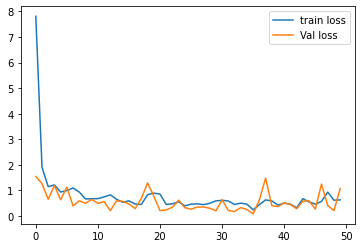

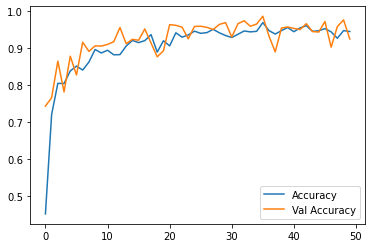

In [17]:
# Display Loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='Val loss')
plt.legend()
plt.show()

#Display Accuracy
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Val Accuracy')
plt.legend()
plt.show()


In [18]:
from tensorflow.keras.models import load_model
md = model.save('inception.h5')

In [19]:
y_pred = model.predict(testing_set)

In [20]:
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 4.9585827e-30, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 7.6738811e-23, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [2.3370409e-28, 6.6278763e-31, 8.7204338e-29, ..., 6.7500383e-33,
        1.0000000e+00, 0.0000000e+00],
       [5.9915892e-19, 1.0304595e-24, 2.6660955e-11, ..., 0.0000000e+00,
        5.7072274e-29, 9.9957210e-01],
       [9.0416873e-01, 1.9534099e-25, 1.5285366e-17, ..., 1.5070219e-13,
        0.0000000e+00, 2.1465990e-30]], dtype=float32)

In [21]:
model = load_model('inception.h5')

In [22]:
img = image.load_img('Tomato-Disease/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1.jpg',target_size=[224,224])
x = image.img_to_array(img)
x = x/255

In [23]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [24]:
model.predict(img_data)

array([[8.3923533e-15, 3.2668137e-05, 9.9996734e-01, 2.7851557e-10,
        4.5407636e-12, 1.2343205e-13, 1.7785991e-12, 2.6441468e-16,
        6.8362065e-12, 1.1894729e-13]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2], dtype=int64)